In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1= pd.read_csv('green_tripdata-one-.csv')
df1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,0.5,0.5,0.00,0.00,NaN,0.3,6.80,2.0,1.0,0.00
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,0.5,0.5,2.81,0.00,NaN,0.3,16.86,1.0,1.0,2.75
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,0.5,0.5,1.00,0.00,NaN,0.3,8.30,1.0,1.0,0.00
3,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,0.5,0.5,0.00,0.00,NaN,0.3,9.30,2.0,1.0,0.00
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,0.0,-0.5,0.00,0.00,NaN,-0.3,-52.80,3.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,NaN,2021-01-15 10:35:00,2021-01-15 10:51:00,NaN,NaN,3,147,NaN,5.97,17.01,0.0,0.0,0.00,0.00,NaN,0.3,17.31,NaN,NaN,NaN
76514,NaN,2021-01-15 10:25:00,2021-01-15 10:34:00,NaN,NaN,242,213,NaN,3.83,27.27,0.0,0.0,2.75,0.00,NaN,0.3,30.32,NaN,NaN,NaN
76515,NaN,2021-01-15 10:16:00,2021-01-15 10:20:00,NaN,NaN,181,181,NaN,0.45,12.89,0.0,0.0,2.75,0.00,NaN,0.3,15.94,NaN,NaN,NaN
76516,NaN,2021-01-15 10:16:00,2021-01-15 10:58:00,NaN,NaN,244,72,NaN,22.21,50.67,0.0,0.0,2.75,6.12,NaN,0.3,59.84,NaN,NaN,NaN


In [3]:
df2= pd.read_csv('green_tripdata_two-.csv')
df2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2021-02-01 00:34:03,2021-02-01 00:51:58,N,1.0,130,205,5.0,3.66,14.00,0.50,0.5,10.00,0.0,NaN,0.3,25.30,1.0,1.0,0.00
1,2.0,2021-02-01 00:04:00,2021-02-01 00:10:30,N,1.0,152,244,1.0,1.10,6.50,0.50,0.5,0.00,0.0,NaN,0.3,7.80,2.0,1.0,0.00
2,2.0,2021-02-01 00:18:51,2021-02-01 00:34:06,N,1.0,152,48,1.0,4.93,16.50,0.50,0.5,0.00,0.0,NaN,0.3,20.55,2.0,1.0,2.75
3,2.0,2021-02-01 00:53:27,2021-02-01 01:11:41,N,1.0,152,241,1.0,6.70,21.00,0.50,0.5,0.00,0.0,NaN,0.3,22.30,2.0,1.0,0.00
4,2.0,2021-02-01 00:57:46,2021-02-01 01:06:44,N,1.0,75,42,1.0,1.89,8.50,0.50,0.5,2.45,0.0,NaN,0.3,12.25,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64567,NaN,2021-02-26 08:46:00,2021-02-26 08:59:00,NaN,NaN,167,247,NaN,1.47,14.55,2.75,0.0,0.00,0.0,NaN,0.3,17.60,NaN,NaN,NaN
64568,NaN,2021-02-26 08:56:00,2021-02-26 09:10:00,NaN,NaN,89,123,NaN,2.87,20.22,2.75,0.0,0.00,0.0,NaN,0.3,23.27,NaN,NaN,NaN
64569,NaN,2021-02-26 08:46:00,2021-02-26 09:07:00,NaN,NaN,127,166,NaN,4.74,24.94,5.50,0.0,0.00,0.0,NaN,0.3,30.74,NaN,NaN,NaN
64570,NaN,2021-02-26 08:17:00,2021-02-26 08:51:00,NaN,NaN,42,137,NaN,7.63,41.81,2.75,0.0,0.00,0.0,NaN,0.3,44.86,NaN,NaN,NaN


In [4]:
con_data= pd.concat([df1,df2])   # concat two dataset
con_data.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,NaN,0.3,6.80,2.0,1.0,0.00
1,2.0,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,NaN,0.3,16.86,1.0,1.0,2.75
2,2.0,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,NaN,0.3,8.30,1.0,1.0,0.00
3,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,NaN,0.3,9.30,2.0,1.0,0.00
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,NaN,-0.3,-52.80,3.0,1.0,0.00
5,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,52.0,0.0,0.5,0.00,0.0,NaN,0.3,52.80,2.0,1.0,0.00
6,2.0,2021-01-01 00:19:14,2021-01-01 00:19:21,N,5.0,265,265,1.0,0.00,180.0,0.0,0.0,36.06,0.0,NaN,0.3,216.36,1.0,2.0,0.00
7,2.0,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.5,0.5,0.5,0.96,0.0,NaN,0.3,5.76,1.0,1.0,0.00
8,2.0,2021-01-01 00:57:46,2021-01-01 00:57:57,N,1.0,225,225,1.0,0.00,2.5,0.5,0.5,0.00,0.0,NaN,0.3,3.80,2.0,1.0,0.00
9,2.0,2021-01-01 00:58:32,2021-01-01 01:32:34,N,1.0,225,265,1.0,12.19,38.0,0.5,0.5,2.75,0.0,NaN,0.3,42.05,1.0,1.0,0.00


In [5]:
con_data.shape

(141090, 20)

In [6]:
con_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141090 entries, 0 to 64571
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               75934 non-null   float64
 1   lpep_pickup_datetime   141090 non-null  object 
 2   lpep_dropoff_datetime  141090 non-null  object 
 3   store_and_fwd_flag     75934 non-null   object 
 4   RatecodeID             75934 non-null   float64
 5   PULocationID           141090 non-null  int64  
 6   DOLocationID           141090 non-null  int64  
 7   passenger_count        75934 non-null   float64
 8   trip_distance          141090 non-null  float64
 9   fare_amount            141090 non-null  float64
 10  extra                  141090 non-null  float64
 11  mta_tax                141090 non-null  float64
 12  tip_amount             141090 non-null  float64
 13  tolls_amount           141090 non-null  float64
 14  ehail_fee              0 non-null    

---
### working on datetime

In [7]:
con_data['lpep_pickup_datetime'].nunique()

108999

In [8]:
con_data['lpep_dropoff_datetime'].nunique()

109069

In [9]:
# convert type to datetime
con_data['lpep_pickup_datetime']= pd.to_datetime(con_data['lpep_pickup_datetime'],format="%Y-%m-%d %H:%M:%S")

In [10]:
# convert type to datetime
con_data['lpep_dropoff_datetime']= pd.to_datetime(con_data['lpep_dropoff_datetime'],format="%Y-%m-%d %H:%M:%S") 

In [11]:
con_data.dtypes

VendorID                        float64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [12]:
con_data['lpep_pickup_datetime']

0       2021-01-01 00:15:56
1       2021-01-01 00:25:59
2       2021-01-01 00:45:57
3       2020-12-31 23:57:51
4       2021-01-01 00:16:36
                ...        
64567   2021-02-26 08:46:00
64568   2021-02-26 08:56:00
64569   2021-02-26 08:46:00
64570   2021-02-26 08:17:00
64571   2021-02-26 08:12:00
Name: lpep_pickup_datetime, Length: 141090, dtype: datetime64[ns]

In [13]:
con_data['lpep_dropoff_datetime']

0       2021-01-01 00:19:52
1       2021-01-01 00:34:44
2       2021-01-01 00:51:55
3       2021-01-01 00:04:56
4       2021-01-01 00:16:40
                ...        
64567   2021-02-26 08:59:00
64568   2021-02-26 09:10:00
64569   2021-02-26 09:07:00
64570   2021-02-26 08:51:00
64571   2021-02-26 08:29:00
Name: lpep_dropoff_datetime, Length: 141090, dtype: datetime64[ns]

In [14]:
#extract month

con_data["month_pickup"] = pd.DatetimeIndex(con_data["lpep_pickup_datetime"]).month
con_data['month_name_pickup']=con_data['lpep_pickup_datetime'].map({1:"JAN",2:"FEB"})

#extract week day 
con_data["week_day_pickup"]= con_data["lpep_pickup_datetime"].dt.weekday

#extract day 
con_data["day_pickup"]= con_data["lpep_pickup_datetime"].dt.day

#extract hour
con_data["hour_pickup"]= con_data["lpep_pickup_datetime"].dt.hour 

con_data =con_data.sort_values(by = "lpep_pickup_datetime",ascending = True)


In [15]:
con_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,month_pickup,month_name_pickup,week_day_pickup,day_pickup,hour_pickup
17275,2.0,2009-01-01 00:03:25,2009-01-01 00:12:25,N,1.0,193,193,1.0,0.00,0.00,...,0.0,0.0,2.0,1.0,0.0,1,NaN,3,1,0
25059,2.0,2009-01-01 00:05:55,2009-01-01 13:00:24,N,1.0,193,193,1.0,0.00,0.00,...,0.0,0.0,1.0,1.0,0.0,1,NaN,3,1,0
21537,2.0,2009-01-01 00:47:49,2009-01-01 01:02:00,N,1.0,193,264,1.0,0.00,3.00,...,0.3,3.8,2.0,1.0,0.0,1,NaN,3,1,0
3,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.3,9.3,2.0,1.0,0.0,12,NaN,3,31,23
40820,NaN,2021-01-01 00:06:00,2021-01-01 00:39:00,NaN,NaN,39,225,NaN,6.27,32.95,...,0.3,36.0,NaN,NaN,NaN,1,NaN,4,1,0


In [16]:
#extract month

con_data["month_dropoff"] = pd.DatetimeIndex(con_data["lpep_dropoff_datetime"]).month
con_data['month_name_dropoff']=con_data['lpep_dropoff_datetime'].map({1:"JAN",2:"FEB"})

#extract week day 
con_data["week_day_dropoff"]= con_data["lpep_dropoff_datetime"].dt.weekday

#extract day 
con_data["day_dropoff"]= con_data["lpep_dropoff_datetime"].dt.day

#extract hour
con_data["hour_dropoff"]= con_data["lpep_dropoff_datetime"].dt.hour 

con_data =con_data.sort_values(by = "lpep_dropoff_datetime",ascending = True)


In [17]:
con_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,month_pickup,month_name_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,month_name_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
17275,2.0,2009-01-01 00:03:25,2009-01-01 00:12:25,N,1.0,193,193,1.0,0.00,0.0,...,1,NaN,3,1,0,1,NaN,3,1,0
21537,2.0,2009-01-01 00:47:49,2009-01-01 01:02:00,N,1.0,193,264,1.0,0.00,3.0,...,1,NaN,3,1,0,1,NaN,3,1,1
25059,2.0,2009-01-01 00:05:55,2009-01-01 13:00:24,N,1.0,193,193,1.0,0.00,0.0,...,1,NaN,3,1,0,1,NaN,3,1,13
3,2.0,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,...,12,NaN,3,31,23,1,NaN,4,1,0
18,2.0,2021-01-01 00:07:20,2021-01-01 00:12:01,N,1.0,75,42,1.0,1.68,6.5,...,1,NaN,4,1,0,1,NaN,4,1,0


In [18]:
con_data.sample(4)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,month_pickup,month_name_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,month_name_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
2039,2.0,2021-01-03 11:37:36,2021-01-03 11:39:58,N,1.0,75,75,1.0,0.64,4.00,...,1,NaN,6,3,11,1,NaN,6,3,11
55574,NaN,2021-02-10 12:10:00,2021-02-10 12:12:00,NaN,NaN,225,225,NaN,0.63,16.73,...,2,NaN,2,10,12,2,NaN,2,10,12
11870,2.0,2021-01-10 16:49:30,2021-01-10 17:02:10,N,1.0,95,10,1.0,4.58,15.50,...,1,NaN,6,10,16,1,NaN,6,10,17
7729,2.0,2021-02-08 12:36:50,2021-02-08 12:46:51,N,1.0,97,97,1.0,1.32,8.00,...,2,NaN,0,8,12,2,NaN,0,8,12


In [19]:
con_data.drop(columns=['month_name_pickup', 'month_name_dropoff'], inplace=True)

In [20]:
con_data.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
count,75934.000000,75934.000000,141090.000000,141090.000000,75934.000000,141090.000000,141090.000000,141090.000000,141090.000000,141090.000000,...,75934.000000,75934.000000,141090.000000,141090.000000,141090.000000,141090.000000,141090.000000,141090.000000,141090.000000,141090.000000
mean,1.820410,1.140899,110.066489,130.674839,1.190389,30.381475,19.854764,1.031408,0.259001,1.224245,...,1.030671,0.613523,1.457743,2.824417,15.754022,12.943703,1.457701,2.825218,15.757141,13.172996
std,0.383848,0.811136,71.261044,77.178520,0.742750,1521.269954,14.677963,1.326812,0.251317,1.966234,...,0.172427,1.144853,0.499009,1.836291,8.203856,4.470008,0.498266,1.836829,8.203721,4.498651
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-280.000000,-5.500000,-0.500000,-9.450000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000,55.000000,65.000000,1.000000,1.300000,9.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,9.000000,10.000000,1.000000,1.000000,9.000000,10.000000
50%,2.000000,1.000000,76.000000,129.000000,1.000000,2.600000,16.730000,0.000000,0.500000,0.000000,...,1.000000,0.000000,1.000000,3.000000,16.000000,13.000000,1.000000,3.000000,16.000000,13.000000
75%,2.000000,1.000000,166.000000,197.000000,1.000000,5.730000,25.400000,2.750000,0.500000,2.750000,...,1.000000,0.000000,2.000000,4.000000,23.000000,16.000000,2.000000,4.000000,23.000000,16.000000
max,2.000000,99.000000,265.000000,265.000000,8.000000,244152.010000,284.000000,8.250000,0.500000,110.000000,...,2.000000,2.750000,12.000000,6.000000,31.000000,23.000000,3.000000,6.000000,31.000000,23.000000


In [21]:
date = pd.Timestamp(2021,1,1)
con_data = con_data[con_data['lpep_pickup_datetime'] >= date ]
con_data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
18,2.0,2021-01-01 00:07:20,2021-01-01 00:12:01,N,1.0,75,42,1.0,1.68,6.50,...,1.0,0.00,1,4,1,0,1,4,1,0
5,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,52.00,...,1.0,0.00,1,4,1,0,1,4,1,0
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,1.0,0.00,1,4,1,0,1,4,1,0
40817,NaN,2021-01-01 00:08:00,2021-01-01 00:17:00,NaN,NaN,42,74,NaN,2.32,8.06,...,NaN,NaN,1,4,1,0,1,4,1,0
27,2.0,2021-01-01 00:15:41,2021-01-01 00:18:57,N,1.0,166,41,1.0,0.65,4.50,...,1.0,0.00,1,4,1,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35454,2.0,2021-02-28 23:48:27,2021-02-28 23:59:20,N,1.0,74,152,1.0,2.63,10.50,...,1.0,0.00,2,6,28,23,2,6,28,23
35450,1.0,2021-02-28 23:50:57,2021-03-01 00:19:27,N,5.0,130,78,1.0,15.90,65.00,...,2.0,0.00,2,6,28,23,3,0,1,0
35460,2.0,2021-02-28 23:30:35,2021-03-01 00:42:24,N,1.0,136,90,1.0,12.98,58.00,...,1.0,0.00,2,6,28,23,3,0,1,0
35401,2.0,2021-02-28 21:30:24,2021-03-01 21:07:48,N,1.0,74,140,1.0,3.07,12.00,...,1.0,2.75,2,6,28,21,3,0,1,21


In [22]:
date = pd.Timestamp(2021,2,28)
con_data = con_data[con_data['lpep_pickup_datetime'] <= date ]
con_data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,trip_type,congestion_surcharge,month_pickup,week_day_pickup,day_pickup,hour_pickup,month_dropoff,week_day_dropoff,day_dropoff,hour_dropoff
18,2.0,2021-01-01 00:07:20,2021-01-01 00:12:01,N,1.0,75,42,1.0,1.68,6.50,...,1.0,0.0,1,4,1,0,1,4,1,0
5,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,52.00,...,1.0,0.0,1,4,1,0,1,4,1,0
4,2.0,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,1.0,0.0,1,4,1,0,1,4,1,0
40817,NaN,2021-01-01 00:08:00,2021-01-01 00:17:00,NaN,NaN,42,74,NaN,2.32,8.06,...,NaN,NaN,1,4,1,0,1,4,1,0
27,2.0,2021-01-01 00:15:41,2021-01-01 00:18:57,N,1.0,166,41,1.0,0.65,4.50,...,1.0,0.0,1,4,1,0,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34441,1.0,2021-02-27 23:58:02,2021-02-28 00:19:43,N,1.0,75,242,1.0,9.90,28.50,...,1.0,0.0,2,5,27,23,2,6,28,0
34442,2.0,2021-02-27 23:55:34,2021-02-28 00:22:25,N,1.0,260,179,1.0,3.23,18.00,...,1.0,0.0,2,5,27,23,2,6,28,0
33360,2.0,2021-02-27 09:23:30,2021-02-28 08:59:48,N,1.0,241,48,1.0,11.33,36.00,...,1.0,0.0,2,5,27,9,2,6,28,8
33583,2.0,2021-02-27 12:12:05,2021-02-28 11:40:27,N,1.0,52,228,1.0,3.62,14.50,...,1.0,0.0,2,5,27,12,2,6,28,11


---
---
### working on (VendorID, store_and_fwd_flag, RatecodeID, payment_type, trip_type) columns to get dummies 

In [23]:
con_data.shape

(139523, 28)

In [24]:
con_data['VendorID'].nunique()

2

In [25]:
con_data['VendorID'].dtypes

dtype('float64')

In [26]:
# VendorID type conversion to get dummies
con_data['VendorID'] = con_data.VendorID.astype('category')

In [27]:
con_data['store_and_fwd_flag'].nunique()

2

In [28]:
con_data['store_and_fwd_flag'].dtypes

dtype('O')

In [29]:
con_data['RatecodeID'].nunique()

6

In [30]:
con_data['RatecodeID'].dtypes

dtype('float64')

In [31]:
# RatecodeID type conversion to get dummies
con_data['RatecodeID'] = con_data.RatecodeID.astype('category')

In [32]:
con_data['payment_type'].nunique()

5

In [33]:
con_data['payment_type'].dtypes

dtype('float64')

In [34]:
# payment_type type conversion to get dummies
con_data['payment_type'] = con_data.payment_type.astype('category')

In [35]:
con_data['trip_type'].nunique()

2

In [36]:
con_data['trip_type'].dtypes

dtype('float64')

In [37]:
# trip_type type conversion to get dummies
con_data['trip_type'] = con_data.trip_type.astype('category')

In [38]:
con_data = pd.get_dummies(con_data)

In [39]:
con_data

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_99.0,payment_type_1.0,payment_type_2.0,payment_type_3.0,payment_type_4.0,payment_type_5.0,trip_type_1.0,trip_type_2.0
18,2021-01-01 00:07:20,2021-01-01 00:12:01,75,42,1.0,1.68,6.50,0.5,0.5,0.00,...,0,0,0,0,1,0,0,0,1,0
5,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,3.0,0.00,52.00,0.0,0.5,0.00,...,0,0,0,0,1,0,0,0,1,0
4,2021-01-01 00:16:36,2021-01-01 00:16:40,265,265,3.0,0.00,-52.00,0.0,-0.5,0.00,...,0,0,0,0,0,1,0,0,1,0
40817,2021-01-01 00:08:00,2021-01-01 00:17:00,42,74,NaN,2.32,8.06,0.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
27,2021-01-01 00:15:41,2021-01-01 00:18:57,166,41,1.0,0.65,4.50,0.5,0.5,0.00,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34441,2021-02-27 23:58:02,2021-02-28 00:19:43,75,242,1.0,9.90,28.50,0.5,0.5,0.00,...,0,0,0,1,0,0,0,0,1,0
34442,2021-02-27 23:55:34,2021-02-28 00:22:25,260,179,1.0,3.23,18.00,0.5,0.5,5.79,...,0,0,0,1,0,0,0,0,1,0
33360,2021-02-27 09:23:30,2021-02-28 08:59:48,241,48,1.0,11.33,36.00,0.0,0.5,7.36,...,0,0,0,1,0,0,0,0,1,0
33583,2021-02-27 12:12:05,2021-02-28 11:40:27,52,228,1.0,3.62,14.50,0.0,0.5,0.00,...,0,0,0,0,1,0,0,0,1,0


In [40]:
con_data.shape

(139523, 40)

In [41]:
con_data.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'PULocationID',
       'DOLocationID', 'passenger_count', 'trip_distance', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'ehail_fee',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'month_pickup', 'week_day_pickup', 'day_pickup', 'hour_pickup',
       'month_dropoff', 'week_day_dropoff', 'day_dropoff', 'hour_dropoff',
       'VendorID_1.0', 'VendorID_2.0', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'RatecodeID_1.0', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_99.0',
       'payment_type_1.0', 'payment_type_2.0', 'payment_type_3.0',
       'payment_type_4.0', 'payment_type_5.0', 'trip_type_1.0',
       'trip_type_2.0'],
      dtype='object')

In [42]:
# renames the columns.
con_data.rename(columns={'VendorID_1.0': 'creative_mobile_technologies_LLC',
                         'VendorID_2.0': 'verifone_inc',
                         'store_and_fwd_flag_N': 'not_a_store_and_forward_trip',
                         'store_and_fwd_flag_Y': 'store_and_forward_trip',
                         'RatecodeID_1.0': 'standard_rate',
                         'RatecodeID_2.0': 'JFK',
                         'RatecodeID_3.0': 'newark',
                         'RatecodeID_4.0': 'nassau_or_westchester',
                         'RatecodeID_5.0': 'negotiated_fare',
                         'RatecodeID_99.0': 'group_ride',
                         'payment_type_1.0': 'credit_card',
                         'payment_type_2.0': 'cash',
                         'payment_type_3.0': 'no_charge',
                         'payment_type_4.0': 'dispute',
                         'payment_type_5.0': 'unknown',
                         'trip_type_1.0': 'street-hail',
                         'trip_type_2.0': 'dispatch',}, inplace= True)

In [43]:
con_data.sample(10)

,lpep_pickup_datetime,lpep_dropoff_datetime,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,...,nassau_or_westchester,negotiated_fare,group_ride,credit_card,cash,no_charge,dispute,unknown,street-hail,dispatch
38696,2021-01-30 11:34:49,2021-01-30 11:46:20,95,95,1.0,1.38,9.00,0.00,0.5,0.00,...,0,0,0,0,1,0,0,0,1,0
71518,2021-01-30 12:47:00,2021-01-30 12:58:00,205,10,NaN,2.48,18.95,2.75,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
28664,2021-01-22 19:58:40,2021-01-22 20:37:56,108,242,1.0,27.91,74.50,1.00,0.5,0.00,...,0,0,0,1,0,0,0,0,1,0
20263,2021-02-17 12:01:40,2021-02-17 12:08:41,166,74,1.0,0.00,5.50,0.00,0.5,0.00,...,0,0,0,1,0,0,0,0,1,0
58368,2021-01-25 14:35:00,2021-01-25 14:41:00,91,91,NaN,1.20,11.45,2.75,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
48041,2021-01-05 18:29:00,2021-01-05 18:41:00,74,237,NaN,2.79,18.95,0.00,0.0,2.75,...,0,0,0,0,0,0,0,0,0,0
25177,2021-01-20 15:31:06,2021-01-20 15:52:20,244,236,1.0,6.20,22.00,0.00,0.5,6.39,...,0,0,0,1,0,0,0,0,1,0
58622,2021-01-05 05:16:00,2021-01-05 05:44:00,225,223,NaN,8.51,46.15,0.00,0.0,2.75,...,0,0,0,0,0,0,0,0,0,0
59976,2021-02-09 06:18:00,2021-02-09 06:36:00,69,242,NaN,5.85,27.27,2.75,0.0,0.00,...,0,0,0,0,0,0,0,0,0,0
31261,2021-01-25 08:52:04,2021-01-25 09:26:46,74,170,1.0,4.96,23.50,0.00,0.5,5.41,...,0,0,0,1,0,0,0,0,1,0


In [44]:
con_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139523 entries, 18 to 34437
Data columns (total 40 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   lpep_pickup_datetime              139523 non-null  datetime64[ns]
 1   lpep_dropoff_datetime             139523 non-null  datetime64[ns]
 2   PULocationID                      139523 non-null  int64         
 3   DOLocationID                      139523 non-null  int64         
 4   passenger_count                   74939 non-null   float64       
 5   trip_distance                     139523 non-null  float64       
 6   fare_amount                       139523 non-null  float64       
 7   extra                             139523 non-null  float64       
 8   mta_tax                           139523 non-null  float64       
 9   tip_amount                        139523 non-null  float64       
 10  tolls_amount                    

---
---

In [45]:
con_data.isna().sum()

lpep_pickup_datetime                     0
lpep_dropoff_datetime                    0
PULocationID                             0
DOLocationID                             0
passenger_count                      64584
trip_distance                            0
fare_amount                              0
extra                                    0
mta_tax                                  0
tip_amount                               0
tolls_amount                             0
ehail_fee                           139523
improvement_surcharge                    0
total_amount                             0
congestion_surcharge                 64584
month_pickup                             0
week_day_pickup                          0
day_pickup                               0
hour_pickup                              0
month_dropoff                            0
week_day_dropoff                         0
day_dropoff                              0
hour_dropoff                             0
creative_mo

In [46]:
con_data.drop(columns=['ehail_fee', 'congestion_surcharge'], inplace=True)

In [47]:
con_data= con_data.drop(['lpep_pickup_datetime','lpep_dropoff_datetime'],axis =1)

In [73]:
# Simple Validation Method
con_data_train , con_data_test = train_test_split(con_data, test_size=0.25, random_state=199)

<AxesSubplot:>

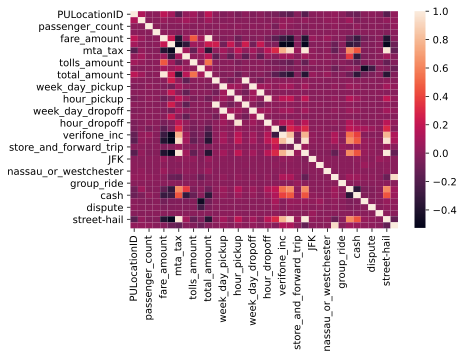

In [74]:
sns.heatmap(con_data.corr())

In [75]:
duplicate = con_data_train.duplicated()
print(duplicate.sum())
con_data_train[duplicate]

63


,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,nassau_or_westchester,negotiated_fare,group_ride,credit_card,cash,no_charge,dispute,unknown,street-hail,dispatch
13251,41,41,1.0,0.34,3.50,1.0,0.5,0.00,0.0,0.3,...,0,0,0,0,1,0,0,0,1,0
30872,74,74,1.0,0.00,2.50,0.0,0.5,0.00,0.0,0.3,...,0,0,0,0,1,0,0,0,1,0
4741,145,145,1.0,0.00,2.50,0.0,0.5,0.00,0.0,0.3,...,0,0,0,0,1,0,0,0,1,0
10663,193,193,1.0,0.00,2.50,0.0,0.5,0.01,0.0,0.3,...,0,0,0,1,0,0,0,0,1,0
26259,193,193,1.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,193,193,1.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
12976,41,41,0.0,0.00,0.01,0.0,0.0,0.00,0.0,0.3,...,0,1,0,0,1,0,0,0,0,1
28142,265,265,1.0,0.00,2.50,1.0,0.5,0.00,0.0,0.3,...,0,0,0,0,1,0,0,0,1,0
4743,145,145,1.0,0.00,2.50,0.0,0.5,0.00,0.0,0.3,...,0,0,0,0,1,0,0,0,1,0


In [76]:
con_data_train.drop_duplicates(inplace=True)

In [77]:
con_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104579 entries, 61699 to 14918
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   PULocationID                      104579 non-null  int64  
 1   DOLocationID                      104579 non-null  int64  
 2   passenger_count                   56134 non-null   float64
 3   trip_distance                     104579 non-null  float64
 4   fare_amount                       104579 non-null  float64
 5   extra                             104579 non-null  float64
 6   mta_tax                           104579 non-null  float64
 7   tip_amount                        104579 non-null  float64
 8   tolls_amount                      104579 non-null  float64
 9   improvement_surcharge             104579 non-null  float64
 10  total_amount                      104579 non-null  float64
 11  month_pickup                      104579 non-null

In [78]:
# fill passenger_count with mean
mean= con_data_train['passenger_count'].mean()

con_data_train['passenger_count'].fillna(mean, inplace= True)
con_data_train

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,nassau_or_westchester,negotiated_fare,group_ride,credit_card,cash,no_charge,dispute,unknown,street-hail,dispatch
61699,112,226,1.189297,1.84,11.09,0.00,0.0,2.66,0.00,0.3,...,0,0,0,0,0,0,0,0,0,0
16259,72,228,1.000000,7.02,24.50,0.00,0.5,10.00,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0
5521,226,226,1.000000,0.00,2.50,0.50,0.5,0.00,0.00,0.3,...,0,0,0,0,1,0,0,0,1,0
34596,75,238,1.000000,1.00,6.00,1.00,0.5,1.17,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0
38425,108,55,1.189297,0.00,17.69,2.75,0.0,0.00,0.00,0.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34238,74,213,1.000000,4.64,16.00,0.00,0.5,0.00,0.00,0.3,...,0,0,0,0,1,0,0,0,1,0
58940,197,117,1.189297,7.63,37.49,2.75,0.0,0.00,2.29,0.3,...,0,0,0,0,0,0,0,0,0,0
20743,74,42,1.000000,1.41,10.00,1.00,0.5,0.00,0.00,0.3,...,0,0,0,0,1,0,0,0,1,0
5458,22,14,1.000000,8.63,30.00,0.50,0.5,2.75,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0


In [79]:
con_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104579 entries, 61699 to 14918
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   PULocationID                      104579 non-null  int64  
 1   DOLocationID                      104579 non-null  int64  
 2   passenger_count                   104579 non-null  float64
 3   trip_distance                     104579 non-null  float64
 4   fare_amount                       104579 non-null  float64
 5   extra                             104579 non-null  float64
 6   mta_tax                           104579 non-null  float64
 7   tip_amount                        104579 non-null  float64
 8   tolls_amount                      104579 non-null  float64
 9   improvement_surcharge             104579 non-null  float64
 10  total_amount                      104579 non-null  float64
 11  month_pickup                      104579 non-null

In [80]:
# trips with zero distances
con_data_train[con_data_train['trip_distance'] == 0]


,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,nassau_or_westchester,negotiated_fare,group_ride,credit_card,cash,no_charge,dispute,unknown,street-hail,dispatch
5521,226,226,1.000000,0.0,2.50,0.50,0.5,0.00,0.0,0.3,...,0,0,0,0,1,0,0,0,1,0
38425,108,55,1.189297,0.0,17.69,2.75,0.0,0.00,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0
43588,250,185,1.189297,0.0,15.45,2.75,0.0,0.00,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0
35542,165,95,1.000000,0.0,34.20,0.00,0.5,0.00,0.0,0.3,...,0,0,0,1,0,0,0,0,1,0
30570,14,89,1.000000,0.0,26.20,0.00,0.5,0.00,0.0,0.3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,129,129,1.000000,0.0,2.50,0.00,0.5,0.00,0.0,0.3,...,0,0,0,0,1,0,0,0,1,0
23275,155,155,1.000000,0.0,2.75,0.00,0.0,0.00,0.0,0.3,...,0,1,0,1,0,0,0,0,0,1
53074,35,161,1.189297,0.0,34.85,2.75,0.0,0.00,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0
43568,185,265,1.189297,0.0,21.16,2.75,0.0,0.00,0.0,0.3,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# removing zero distance trips
con_data_train = con_data_train[con_data_train['trip_distance'] > 0]
con_data_train.describe()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,nassau_or_westchester,negotiated_fare,group_ride,credit_card,cash,no_charge,dispute,unknown,street-hail,dispatch
count,101267.000000,101267.000000,101267.000000,101267.000000,101267.000000,101267.000000,101267.000000,101267.000000,101267.000000,101267.000000,...,101267.000000,101267.000000,101267.0,101267.000000,101267.000000,101267.000000,101267.000000,101267.0,101267.000000,101267.000000
mean,109.209328,130.335450,1.191956,33.279118,19.991298,1.050135,0.258095,1.241804,0.547496,0.299052,...,0.000296,0.012906,0.0,0.319877,0.205704,0.002538,0.000829,0.0,0.517592,0.011356
std,70.893815,77.015183,0.544260,1634.847184,14.513308,1.331290,0.250777,1.936813,1.871142,0.021352,...,0.017209,0.112872,0.0,0.466431,0.404217,0.050313,0.028789,0.0,0.499693,0.105959
min,3.000000,1.000000,0.000000,0.010000,-52.000000,-5.500000,-0.500000,-2.750000,0.000000,-0.300000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,55.000000,65.000000,1.000000,1.400000,9.000000,0.000000,0.000000,0.000000,0.000000,0.300000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,75.000000,128.000000,1.189297,2.710000,16.830000,0.000000,0.500000,0.000000,0.000000,0.300000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,166.000000,197.000000,1.189297,5.910000,25.500000,2.750000,0.500000,2.750000,0.000000,0.300000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,265.000000,265.000000,6.000000,244152.010000,268.000000,8.250000,0.500000,110.000000,31.250000,0.300000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


In [82]:
con_data_train.shape

(101267, 36)

In [83]:
# removing trips with zero/negative fares
con_data_train= con_data_train[con_data_train['fare_amount'] > 0]
con_data_train

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,nassau_or_westchester,negotiated_fare,group_ride,credit_card,cash,no_charge,dispute,unknown,street-hail,dispatch
61699,112,226,1.189297,1.84,11.09,0.00,0.0,2.66,0.00,0.3,...,0,0,0,0,0,0,0,0,0,0
16259,72,228,1.000000,7.02,24.50,0.00,0.5,10.00,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0
34596,75,238,1.000000,1.00,6.00,1.00,0.5,1.17,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0
22779,43,170,1.000000,4.15,16.00,0.00,0.5,5.86,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0
63942,42,216,1.189297,16.80,44.32,2.75,0.0,0.00,6.12,0.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34238,74,213,1.000000,4.64,16.00,0.00,0.5,0.00,0.00,0.3,...,0,0,0,0,1,0,0,0,1,0
58940,197,117,1.189297,7.63,37.49,2.75,0.0,0.00,2.29,0.3,...,0,0,0,0,0,0,0,0,0,0
20743,74,42,1.000000,1.41,10.00,1.00,0.5,0.00,0.00,0.3,...,0,0,0,0,1,0,0,0,1,0
5458,22,14,1.000000,8.63,30.00,0.50,0.5,2.75,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0


In [84]:
# removing passenger_count with zero/negative 
con_data_train= con_data_train[con_data_train['passenger_count'] > 0]
con_data_train

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,nassau_or_westchester,negotiated_fare,group_ride,credit_card,cash,no_charge,dispute,unknown,street-hail,dispatch
61699,112,226,1.189297,1.84,11.09,0.00,0.0,2.66,0.00,0.3,...,0,0,0,0,0,0,0,0,0,0
16259,72,228,1.000000,7.02,24.50,0.00,0.5,10.00,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0
34596,75,238,1.000000,1.00,6.00,1.00,0.5,1.17,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0
22779,43,170,1.000000,4.15,16.00,0.00,0.5,5.86,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0
63942,42,216,1.189297,16.80,44.32,2.75,0.0,0.00,6.12,0.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34238,74,213,1.000000,4.64,16.00,0.00,0.5,0.00,0.00,0.3,...,0,0,0,0,1,0,0,0,1,0
58940,197,117,1.189297,7.63,37.49,2.75,0.0,0.00,2.29,0.3,...,0,0,0,0,0,0,0,0,0,0
20743,74,42,1.000000,1.41,10.00,1.00,0.5,0.00,0.00,0.3,...,0,0,0,0,1,0,0,0,1,0
5458,22,14,1.000000,8.63,30.00,0.50,0.5,2.75,0.00,0.3,...,0,0,0,1,0,0,0,0,1,0


In [85]:
con_data_train.describe()

,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,nassau_or_westchester,negotiated_fare,group_ride,credit_card,cash,no_charge,dispute,unknown,street-hail,dispatch
count,100994.000000,100994.000000,100994.000000,100994.000000,100994.000000,100994.000000,100994.000000,100994.000000,100994.000000,100994.000000,...,100994.000000,100994.000000,100994.0,100994.000000,100994.000000,100994.000000,100994.000000,100994.0,100994.000000,100994.000000
mean,109.206587,130.335139,1.193114,33.359620,20.040963,1.052971,0.258798,1.244078,0.548496,0.299834,...,0.000287,0.012407,0.0,0.320425,0.204973,0.001822,0.000535,0.0,0.516872,0.010882
std,70.901121,77.008187,0.543036,1637.054509,14.489591,1.331298,0.249846,1.934557,1.872634,0.007062,...,0.016943,0.110693,0.0,0.466642,0.403684,0.042645,0.023117,0.0,0.499718,0.103747
min,3.000000,1.000000,1.000000,0.010000,0.010000,-5.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,55.000000,65.000000,1.000000,1.400000,9.000000,0.000000,0.000000,0.000000,0.000000,0.300000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,75.000000,128.000000,1.189297,2.720000,16.830000,0.000000,0.500000,0.000000,0.000000,0.300000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,166.000000,197.000000,1.189297,5.910000,25.500000,2.750000,0.500000,2.750000,0.000000,0.300000,...,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,265.000000,265.000000,6.000000,244152.010000,268.000000,8.250000,0.500000,110.000000,31.250000,0.300000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


# Visualisation

In [86]:
# fig1=plt.figure(figsize=(8, 6))
# ax5=fig1.add_subplot(1,1,1)
# ax5.scatter(con_data_train.trip_distance, con_data_train.fare_amount, color='green')
# ax5.set_title('The graph of payment depending on the trip_distance')
# ax5.set_xlabel('Day of the week')
# ax5.set_ylabel('Payment');

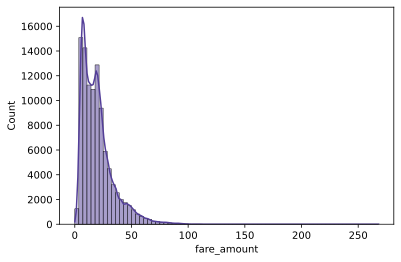

In [87]:
# frequency of fare_amount
sns.histplot(con_data_train['fare_amount'], bins = 75, kde=True, color = '#533e98');

In [ ]:
# fig2=plt.figure(figsize=(8, 6))
# ax5=fig2.add_subplot(1,1,1)
# ax5.scatter(con_data_train.passenger_count, con_data_train.fare_amount, color='green')
# ax5.set_title('The graph of payment depending on the number of passengers');
# ax5.set_xlabel('Number of passengers')
# ax5.set_ylabel('Payment');

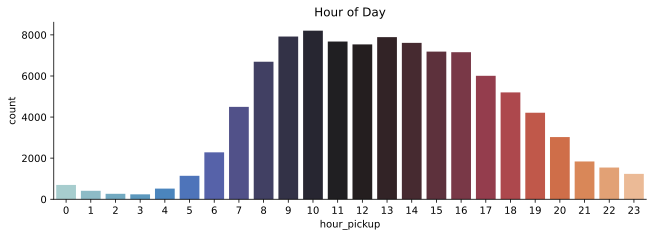

In [88]:
# taxi trip repartition by hour of the day
sns.catplot(x='hour_pickup', kind='count', palette='icefire', data=con_data_train, height=3, aspect=3);
plt.title('Hour of Day');

In [ ]:
# relationship between hour_dropoff and fare_amount
# plot(x = con_data_train['hour_dropoff'], y = con_data_train['fare_amount'])
# con_data.plot(x='fare_amount', y=['hour_pickup',hour_dropoff], kind='barh')

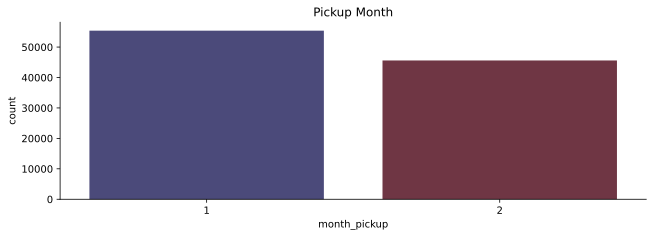

In [89]:
# taxi trip repartition by pickup month
sns.catplot(x='month_pickup', kind='count', palette='icefire', data=con_data_train, height=3, aspect=3);
plt.title('Pickup Month');

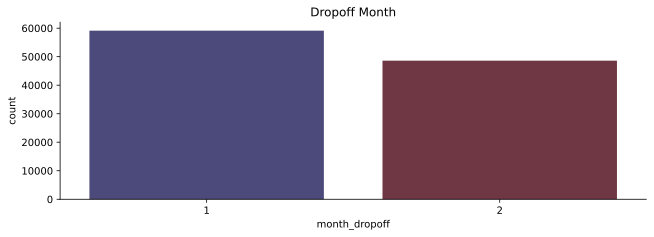

In [65]:
# taxi trip repartition by dropoff month
sns.catplot(x='month_dropoff', kind='count', palette='icefire', data=con_data_train, height=3, aspect=3);
plt.title('Dropoff Month');

1. Does the number of passengers affect the fare?

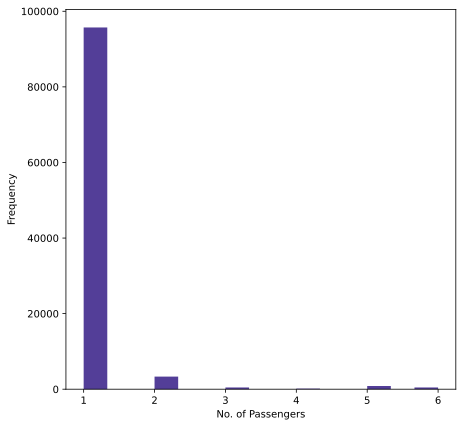

In [90]:
plt.figure(figsize=(7,7))
plt.hist(con_data_train['passenger_count'], bins=15, color='#533e98' )
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency');

In [ ]:
# plt.figure(figsize=(7,7))
# plt.scatter(x=con_data_train['passenger_count'], y=con_data_train['fare_amount'], s=1.5)
# plt.xlabel('No. of Passengers')
# plt.ylabel('Fare');

2. Does the time of pickup affect the fare?

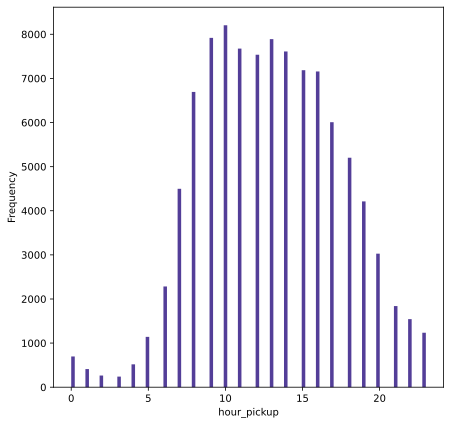

In [91]:
plt.figure(figsize=(7,7))
plt.hist(con_data_train['hour_pickup'], bins=100, color='#533e98')
plt.xlabel('hour_pickup')
plt.ylabel('Frequency');

In [ ]:
# plt.figure(figsize=(7,7))
# plt.scatter(x=con_data_train['hour_pickup'], y=con_data_train['fare_amount'], s=1.5)
# plt.xlabel('hour_pickup')
# plt.ylabel('Fare');

3. Does the day of the week affect the fare?



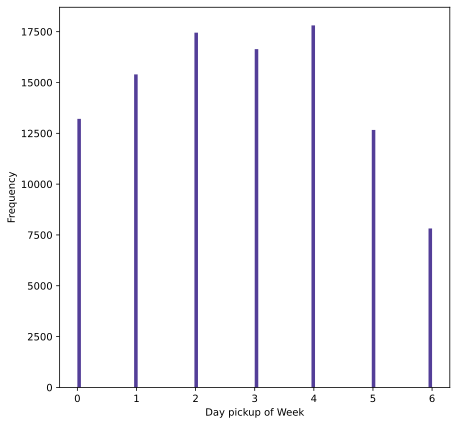

In [92]:
plt.figure(figsize=(7,7))
plt.hist(con_data_train['week_day_pickup'], bins=100, color='#533e98')
plt.xlabel('Day pickup of Week')
plt.ylabel('Frequency');

 day of the week doesn't seem to have that much of an influence on the number of cab rides.



In [ ]:
# plt.figure(figsize=(7,7))
# plt.scatter(x=con_data_train['week_day_pickup'], y=con_data_train['fare_amount'], s=1.5)
# plt.xlabel('Day pickup of Week')
# plt.ylabel('Fare');

Linear Regression

In [93]:
X_train, y_train = con_data_train.drop(columns= 'fare_amount'), con_data_train['fare_amount']

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.2, random_state=199)

In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80795 entries, 32424 to 2168
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PULocationID                      80795 non-null  int64  
 1   DOLocationID                      80795 non-null  int64  
 2   passenger_count                   80795 non-null  float64
 3   trip_distance                     80795 non-null  float64
 4   extra                             80795 non-null  float64
 5   mta_tax                           80795 non-null  float64
 6   tip_amount                        80795 non-null  float64
 7   tolls_amount                      80795 non-null  float64
 8   improvement_surcharge             80795 non-null  float64
 9   total_amount                      80795 non-null  float64
 10  month_pickup                      80795 non-null  int64  
 11  week_day_pickup                   80795 non-null  int64  
 12  d

In [96]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(con_data_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(con_data_test.values)

lm_poly = LinearRegression()

ValueError: X has 36 features, but StandardScaler is expecting 35 features as input.